In [32]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [33]:
data = pd.read_csv('Catalogues/NGC2539_2.csv')
data

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
3,120.828863,-12.102368,3036174503951833984,0.3092,0.2460,0.6575,0.5399,2.136,-2.117,0.436,...,1.046,20.013603,20.620640,19.541338,1.079302,NaN,-31.758399,120.828872,-12.102367,0.665763
4,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,122.595626,-10.841704,5728387720230650880,0.2191,0.2004,0.6737,0.3649,3.849,-3.663,0.338,...,1.022,19.428995,20.133577,18.738420,1.395157,NaN,-30.113705,122.595642,-10.841699,0.681967
12249,122.605064,-10.840512,5728387823309867136,0.2117,0.1868,0.5995,0.3435,1.575,-0.521,0.333,...,0.991,19.432290,19.966003,18.762100,1.203903,NaN,-30.110253,122.605066,-10.840505,0.614925
12250,122.441781,-10.867706,5728389644375975424,0.1436,0.1257,0.5921,0.2286,2.406,-2.406,0.236,...,1.031,18.805159,19.301994,18.132660,1.169334,NaN,-30.176260,122.441792,-10.867706,0.614038
12251,122.439955,-10.866530,5728389644376189952,0.1428,0.1257,0.6225,0.2265,2.891,-2.606,0.237,...,0.997,18.811468,19.214546,18.213182,1.001364,NaN,-30.175563,122.439967,-10.866535,0.644494


In [4]:
#https://simbad.cds.unistra.fr/simbad/sim-ref?bibcode=2020A%26A...633A..99C
pmra_sbd = -2.331
pmde_sbd = -0.584
L_size = 2

data_mov = movprop_filter(data,pmra_sbd,pmde_sbd,L_size,"vizier")
len(data_mov)

119477

Text(0.5, 0, 'RA (deg)')

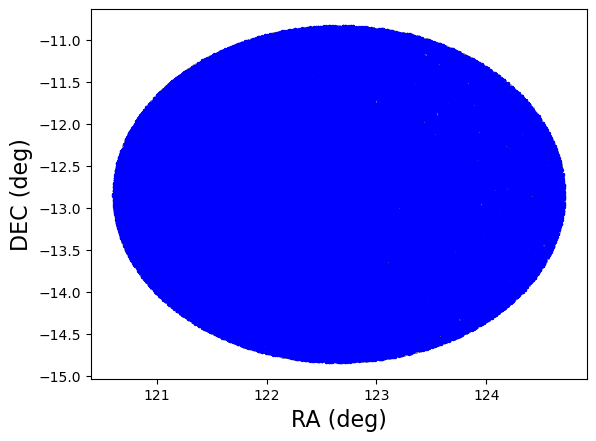

In [7]:
fig, ax = plt.subplots()
ax.scatter(data.RAJ2000, data.DEJ2000, color='gray', s=1)
ax.scatter(data_mov.RAJ2000, data_mov.DEJ2000,color = 'blue', s=2)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (deg)",fontsize=16)

Text(0.5, 0, 'pmra')

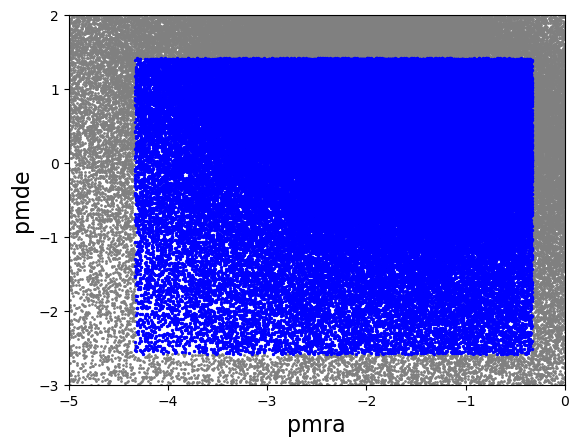

In [14]:
fig, ax = plt.subplots()
ax.scatter(data.pmRA, data.pmDE, color='gray', s=1)
ax.scatter(data_mov.pmRA, data_mov.pmDE,color = 'blue', s=2)
ax.set_xlim(-5.,0)
ax.set_ylim(-3.,2.)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)

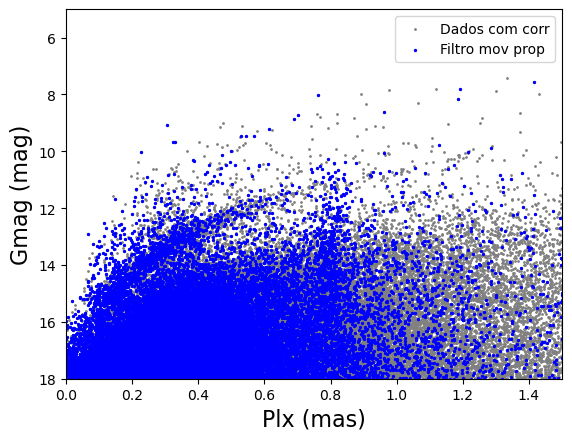

In [15]:
fig, ax = plt.subplots()
ax.scatter(data.Plx_corr,data.Gmag, color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov.Plx_corr,data_mov.Gmag,color = 'blue', s=2, label='Filtro mov prop')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

### Cut in Parallax

In [24]:
ll, = np.where((data_mov["Plx_corr"] < 0.9)&(data_mov["Plx_corr"] > 0.6))

In [25]:
data_plx = data_mov.iloc[ll]

Text(0.5, 0, 'RA (deg)')

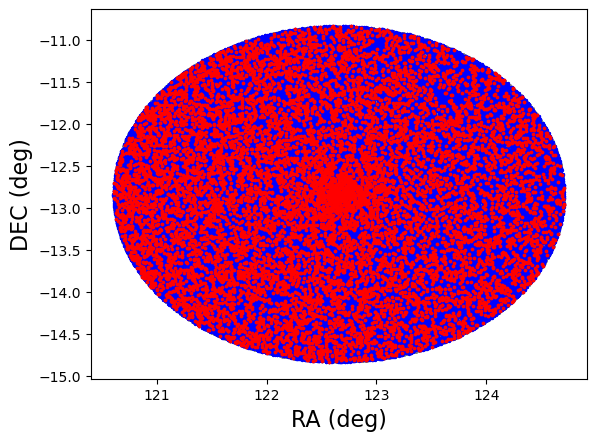

In [26]:
fig, ax = plt.subplots()
ax.scatter(data.RAJ2000, data.DEJ2000, color='gray', s=1)
ax.scatter(data_mov.RAJ2000, data_mov.DEJ2000,color = 'blue', s=2)
ax.scatter(data_plx.RAJ2000, data_plx.DEJ2000,color = 'r', s=3)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (deg)",fontsize=16)

Text(0.5, 0, 'pmra')

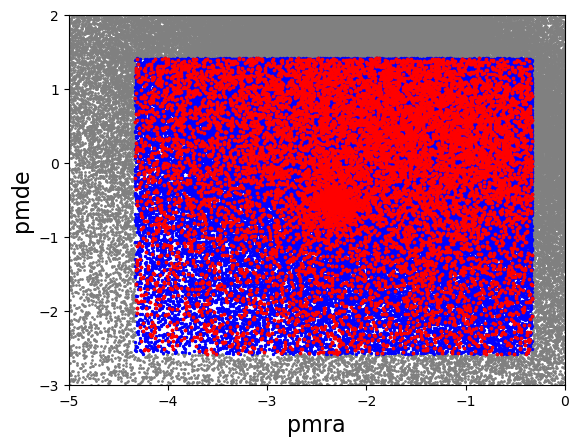

In [27]:
fig, ax = plt.subplots()
ax.scatter(data.pmRA, data.pmDE, color='gray', s=1)
ax.scatter(data_mov.pmRA, data_mov.pmDE,color = 'blue', s=2)
ax.scatter(data_plx.pmRA, data_plx.pmDE,color = 'r', s=3)
ax.set_xlim(-5.,0)
ax.set_ylim(-3.,2.)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)

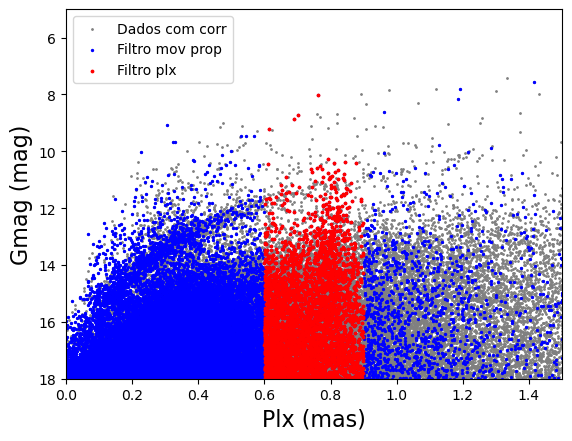

In [28]:
fig, ax = plt.subplots()
ax.scatter(data.Plx_corr,data.Gmag, color='gray', s=1, label='Dados com corr')
ax.scatter(data_mov.Plx_corr,data_mov.Gmag,color = 'blue', s=2, label='Filtro mov prop')
ax.scatter(data_plx.Plx_corr,data_plx.Gmag,color = 'r', s=3, label='Filtro plx')
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
plt.legend()

In [31]:
#data_plx.to_csv('Catalogues/NGC2539_4.csv', index=False) 